<a href="https://colab.research.google.com/github/Starleen1996/TelecomX_Parte2_Latam_Predicci-n_Modelos/blob/main/TelecomX_LATAM_Parte2_Predicci%C3%B3n_Modelos_Actualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X – Parte 2: Predicción de Cancelación (Churn)

In [388]:
import requests
import json
import pandas as pd
import sklearn
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import yellowbrick


#### Extracción del Archivo Tratado - Predicción de Cancelación (Churn)

In [389]:
url = 'https://raw.githubusercontent.com/Starleen1996/TelecomX_Parte2_Latam_Predicci-n_Modelos/refs/heads/main/df_clientes_LATAM.csv'

# Posteriormente vamos a leer la url con los datos
datos = pd.read_csv(url)
datos.head()

,ID_cliente,cliente_vigente,genero,cliente>=65_anos,matrimonio,tiene_dependientes,#_meses_contrato,servicio_telefonico,suscripcion>1_linea,internet_internetservice,...,suscripcion_proteccion,suscripcion_soporte,suscripcion_tv_cable,suscripcion_peliculas,tipo_contrato,factura_electronica,forma_pago,total_servicios_mes,total_pagado_cliente,Cuentas_Diarias
0,0002-orfbo,0,Female,0,1,1,9,1,0,Dsl,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,19.776667
1,0003-mknfe,0,Male,0,0,0,9,1,1,Dsl,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,18.080000
2,0004-tlhlj,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,9.361667
3,0011-igkff,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,41.261667
4,0013-exchz,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,8.913333


In [390]:
#Verificamos la información de la base de datos para observar el tipo de variables, total de columnas,total de filas.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_cliente                   7043 non-null   object 
 1   cliente_vigente              7043 non-null   int64  
 2   genero                       7043 non-null   object 
 3   cliente>=65_anos             7043 non-null   int64  
 4   matrimonio                   7043 non-null   int64  
 5   tiene_dependientes           7043 non-null   int64  
 6   #_meses_contrato             7043 non-null   int64  
 7   servicio_telefonico          7043 non-null   int64  
 8   suscripcion>1_linea          7043 non-null   int64  
 9   internet_internetservice     7043 non-null   object 
 10  suscripcion_seguridad_linea  7043 non-null   object 
 11  suscripcion_de_respaldo      7043 non-null   object 
 12  suscripcion_proteccion       7043 non-null   object 
 13  suscripcion_soport

In [391]:
datos.shape

(7043, 22)

In [392]:
datos.describe()

,cliente_vigente,cliente>=65_anos,matrimonio,tiene_dependientes,#_meses_contrato,servicio_telefonico,suscripcion>1_linea,factura_electronica,total_servicios_mes,total_pagado_cliente,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7032.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.592219,64.761692,2283.300441,76.110015
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.491457,30.090047,2266.771362,75.559045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.626667
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,35.500000,401.450000,13.381667
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,70.350000,1397.475000,46.582500
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,126.491250
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,289.493333


In [393]:
datos.describe(include='O') # Podemos ver la estadistica descriptiva de las variables categoricas

,ID_cliente,genero,internet_internetservice,suscripcion_seguridad_linea,suscripcion_de_respaldo,suscripcion_proteccion,suscripcion_soporte,suscripcion_tv_cable,suscripcion_peliculas,tipo_contrato,forma_pago
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,3,3,3,3,3,3,4
top,9995-hotoh,Male,Fiber optic,0,0,0,0,0,0,Month-to-month,Electronic check
freq,1,3555,3096,3498,3088,3095,3473,2810,2785,3875,2365


#### Eliminación de columnas irrelevantes
Vamos a realizar la eliminación de la columna ID_Cliente ya que no aporta valor al análisis o al modelo predictivo

In [394]:
# Con este código eliminamos la columna ID_clientes de nuentra Dataframe
datos = datos.drop('ID_cliente', axis=1)


In [395]:
datos.info()
datos.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cliente_vigente              7043 non-null   int64  
 1   genero                       7043 non-null   object 
 2   cliente>=65_anos             7043 non-null   int64  
 3   matrimonio                   7043 non-null   int64  
 4   tiene_dependientes           7043 non-null   int64  
 5   #_meses_contrato             7043 non-null   int64  
 6   servicio_telefonico          7043 non-null   int64  
 7   suscripcion>1_linea          7043 non-null   int64  
 8   internet_internetservice     7043 non-null   object 
 9   suscripcion_seguridad_linea  7043 non-null   object 
 10  suscripcion_de_respaldo      7043 non-null   object 
 11  suscripcion_proteccion       7043 non-null   object 
 12  suscripcion_soporte          7043 non-null   object 
 13  suscripcion_tv_cab

(7043, 21)

In [396]:
datos.columns

Index(['cliente_vigente', 'genero', 'cliente>=65_anos', 'matrimonio',
       'tiene_dependientes', '#_meses_contrato', 'servicio_telefonico',
       'suscripcion>1_linea', 'internet_internetservice',
       'suscripcion_seguridad_linea', 'suscripcion_de_respaldo',
       'suscripcion_proteccion', 'suscripcion_soporte', 'suscripcion_tv_cable',
       'suscripcion_peliculas', 'tipo_contrato', 'factura_electronica',
       'forma_pago', 'total_servicios_mes', 'total_pagado_cliente',
       'Cuentas_Diarias'],
      dtype='object')

In [397]:
## Realizmos histogramas agrupando datos y comparandolo con la variable objetivo (churn). El valor = o corresponde a "NO" y el valor = 1 corrresponde a "SI".
px.histogram(datos, x='suscripcion>1_linea', color='cliente_vigente', text_auto=True,barmode='group')
# Podemos identificar que los clientes con mas de 1 servicio (diagrama de la derecha), muestra un retiro de 2121 personas y siguen en la compañia 850.
# Podemos identificar que los clientes que tienen  1 servicio (diagrama de la izquierda), triplican (3053 personas) sobre los que aún siguen afiliados a la compañia (1019).

In [398]:
# Realizmos histogramas agrupando datos y comparandolo con la variable objetivo (churn). El valor = o corresponde a "NO" y el valor = 1 corrresponde a "SI".
px.histogram(datos, x='genero', color='cliente_vigente', text_auto=True,barmode='group')
#

In [399]:
# Realizmos histogramas agrupando datos y comparandolo con la variable objetivo (churn). El valor = o corresponde a "NO" y el valor = 1 corrresponde a "SI".
px.histogram(datos, x='cliente>=65_anos', color='cliente_vigente', text_auto=True,barmode='group')
#

In [400]:
px.box(datos, x='#_meses_contrato', color='cliente_vigente')

In [401]:
px.box(datos, x='total_servicios_mes', color='cliente_vigente')

#ENCODING
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [402]:
from sklearn.compose import make_column_transformer  # Este modulo ayuda a realizar una transformación de columnas
from sklearn.preprocessing import OneHotEncoder # Ayuda a realizar transformación de 1 y 0

In [403]:
#Definir variables explicativas (X) y de respuesta (y)

X = datos.drop('cliente_vigente', axis=1)
y= datos['cliente_vigente']


In [404]:
y

,cliente_vigente
0,0
1,0
2,1
3,1
4,1
...,...
7038,0
7039,1
7040,0
7041,0


In [405]:
columnas = X.columns # Creamos una variable llamada columnas
columnas

Index(['genero', 'cliente>=65_anos', 'matrimonio', 'tiene_dependientes',
       '#_meses_contrato', 'servicio_telefonico', 'suscripcion>1_linea',
       'internet_internetservice', 'suscripcion_seguridad_linea',
       'suscripcion_de_respaldo', 'suscripcion_proteccion',
       'suscripcion_soporte', 'suscripcion_tv_cable', 'suscripcion_peliculas',
       'tipo_contrato', 'factura_electronica', 'forma_pago',
       'total_servicios_mes', 'total_pagado_cliente', 'Cuentas_Diarias'],
      dtype='object')

In [406]:
datos

,cliente_vigente,genero,cliente>=65_anos,matrimonio,tiene_dependientes,#_meses_contrato,servicio_telefonico,suscripcion>1_linea,internet_internetservice,suscripcion_seguridad_linea,...,suscripcion_proteccion,suscripcion_soporte,suscripcion_tv_cable,suscripcion_peliculas,tipo_contrato,factura_electronica,forma_pago,total_servicios_mes,total_pagado_cliente,Cuentas_Diarias
0,0,Female,0,1,1,9,1,0,Dsl,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,19.776667
1,0,Male,0,0,0,9,1,1,Dsl,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,18.080000
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,9.361667
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,41.261667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,8.913333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,0,0,0,13,1,0,Dsl,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,24.763333
7039,1,Male,0,1,0,22,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,62.456667
7040,0,Male,0,0,0,2,1,0,Dsl,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,3.091667
7041,0,Male,0,1,1,67,1,0,Dsl,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,154.255000


In [407]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                  ['genero','internet_internetservice','tipo_contrato','forma_pago']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [408]:
X = one_hot.fit_transform(X)
 # one_hot.fit(X) y one_hot.transform(X) (o fit_transform)normalmente devuelven un ndarray (denso) o scipy.sparse según la configuración (sparse_threshold, OneHotEncoder.sparse_output, etc.). En tu caso sparse_threshold=0 forzará un ndarray denso.

In [409]:
one_hot.get_feature_names_out(columnas)
#sirve para obtener los nombres de las columnas que genera tu transformador (one_hot) después de aplicarlo a las columnas originales que pasaste (en este caso, columnas).

array(['onehotencoder__genero_Male',
       'onehotencoder__internet_internetservice_0',
       'onehotencoder__internet_internetservice_Dsl',
       'onehotencoder__internet_internetservice_Fiber optic',
       'onehotencoder__tipo_contrato_Month-to-month',
       'onehotencoder__tipo_contrato_One year',
       'onehotencoder__tipo_contrato_Two year',
       'onehotencoder__forma_pago_Bank transfer (automatic)',
       'onehotencoder__forma_pago_Credit card (automatic)',
       'onehotencoder__forma_pago_Electronic check',
       'onehotencoder__forma_pago_Mailed check',
       'remainder__cliente>=65_anos', 'remainder__matrimonio',
       'remainder__tiene_dependientes', 'remainder__#_meses_contrato',
       'remainder__servicio_telefonico', 'remainder__suscripcion>1_linea',
       'remainder__suscripcion_seguridad_linea',
       'remainder__suscripcion_de_respaldo',
       'remainder__suscripcion_proteccion',
       'remainder__suscripcion_soporte',
       'remainder__suscripcion_tv

In [410]:
X

array([[0.0, 0.0, 1.0, ..., 65.6, 593.3, 19.776666666666664],
       [1.0, 0.0, 1.0, ..., 59.9, 542.4, 18.08],
       [1.0, 0.0, 0.0, ..., 73.9, 280.85, 9.361666666666668],
       ...,
       [1.0, 0.0, 1.0, ..., 50.3, 92.75, 3.091666666666667],
       [1.0, 0.0, 1.0, ..., 67.85, 4627.65, 154.255],
       [1.0, 0.0, 1.0, ..., 59.0, 3707.6, 123.58666666666666]],
      dtype=object)

In [411]:
 pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__genero_Male,onehotencoder__internet_internetservice_0,onehotencoder__internet_internetservice_Dsl,onehotencoder__internet_internetservice_Fiber optic,onehotencoder__tipo_contrato_Month-to-month,onehotencoder__tipo_contrato_One year,onehotencoder__tipo_contrato_Two year,onehotencoder__forma_pago_Bank transfer (automatic),onehotencoder__forma_pago_Credit card (automatic),onehotencoder__forma_pago_Electronic check,...,remainder__suscripcion_seguridad_linea,remainder__suscripcion_de_respaldo,remainder__suscripcion_proteccion,remainder__suscripcion_soporte,remainder__suscripcion_tv_cable,remainder__suscripcion_peliculas,remainder__factura_electronica,remainder__total_servicios_mes,remainder__total_pagado_cliente,remainder__Cuentas_Diarias
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,1,1,0,1,65.6,593.3,19.776667
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,59.9,542.4,18.08
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,1,73.9,280.85,9.361667
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,1,1,0,1,1,1,98.0,1237.85,41.261667
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,1,83.9,267.4,8.913333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,55.15,742.9,24.763333
7039,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,1,85.1,1873.7,62.456667
7040,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,50.3,92.75,3.091667
7041,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,1,0,1,0,67.85,4627.65,154.255


#### Verificación de la Proporción de Cancelación (Churn)
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [412]:
datos.value_counts('cliente_vigente')
# Verificando la proporción de cancelación vemos un desbalance en la variable (clientes vigentes).
# 0 = Clientes que siguen en la compañia
# 1 = Clientes que se han retirado en la compañia

# Con el fin de que ambas clases  queden con igual proporción de los datos vamos a realizar una estratificación en nuestra variable objetivo o de respuesta.

,count
cliente_vigente,
0,5174
1,1869


In [413]:
datos['cliente_vigente'].value_counts(normalize=True)


,proportion
cliente_vigente,
0,0.73463
1,0.26537


In [414]:
from sklearn.model_selection import StratifiedKFold # Aseguramos que la proporción de cada clase se mantenga

#Correlación
¿Cuáles factores están relacionados con el Churn? ¿Cómo es esa relación?

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* -1: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.

* 0: no hay relación lineal entre las variables.

* 1: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.

In [415]:
datos

,cliente_vigente,genero,cliente>=65_anos,matrimonio,tiene_dependientes,#_meses_contrato,servicio_telefonico,suscripcion>1_linea,internet_internetservice,suscripcion_seguridad_linea,...,suscripcion_proteccion,suscripcion_soporte,suscripcion_tv_cable,suscripcion_peliculas,tipo_contrato,factura_electronica,forma_pago,total_servicios_mes,total_pagado_cliente,Cuentas_Diarias
0,0,Female,0,1,1,9,1,0,Dsl,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,19.776667
1,0,Male,0,0,0,9,1,1,Dsl,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,18.080000
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,9.361667
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,41.261667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,8.913333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,0,0,0,13,1,0,Dsl,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,24.763333
7039,1,Male,0,1,0,22,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,62.456667
7040,0,Male,0,0,0,2,1,0,Dsl,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,3.091667
7041,0,Male,0,1,1,67,1,0,Dsl,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,154.255000


In [416]:
# Filtrar solo variables numéricas para ver la correlación entre las variables
df_numericas = datos.select_dtypes(include=['int64', 'float64'])

In [417]:
df_numericas

,cliente_vigente,cliente>=65_anos,matrimonio,tiene_dependientes,#_meses_contrato,servicio_telefonico,suscripcion>1_linea,factura_electronica,total_servicios_mes,total_pagado_cliente,Cuentas_Diarias
0,0,0,1,1,9,1,0,1,65.60,593.30,19.776667
1,0,0,0,0,9,1,1,0,59.90,542.40,18.080000
2,1,0,0,0,4,1,0,1,73.90,280.85,9.361667
3,1,1,1,0,13,1,0,1,98.00,1237.85,41.261667
4,1,1,1,0,3,1,0,1,83.90,267.40,8.913333
...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,13,1,0,0,55.15,742.90,24.763333
7039,1,0,1,0,22,1,1,1,85.10,1873.70,62.456667
7040,0,0,0,0,2,1,0,1,50.30,92.75,3.091667
7041,0,0,1,1,67,1,0,0,67.85,4627.65,154.255000


In [418]:
# Calcular correlación
corr = df_numericas.corr()
corr

,cliente_vigente,cliente>=65_anos,matrimonio,tiene_dependientes,#_meses_contrato,servicio_telefonico,suscripcion>1_linea,factura_electronica,total_servicios_mes,total_pagado_cliente,Cuentas_Diarias
cliente_vigente,1.000000,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,0.191825,0.193356,-0.199484,-0.199484
cliente>=65_anos,0.150889,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.156530,0.220173,0.102411,0.102411
matrimonio,-0.150448,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.014877,0.096848,0.319072,0.319072
tiene_dependientes,-0.164221,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.111377,-0.113890,0.064653,0.064653
#_meses_contrato,-0.352229,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.006152,0.247900,0.825880,0.825880
servicio_telefonico,0.011942,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.016505,0.247398,0.113008,0.113008
suscripcion>1_linea,0.040102,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.163530,0.490434,0.469042,0.469042
factura_electronica,0.191825,0.156530,-0.014877,-0.111377,0.006152,0.016505,0.163530,1.000000,0.352150,0.157830,0.157830
total_servicios_mes,0.193356,0.220173,0.096848,-0.113890,0.247900,0.247398,0.490434,0.352150,1.000000,0.651065,0.651065
total_pagado_cliente,-0.199484,0.102411,0.319072,0.064653,0.825880,0.113008,0.469042,0.157830,0.651065,1.000000,1.000000


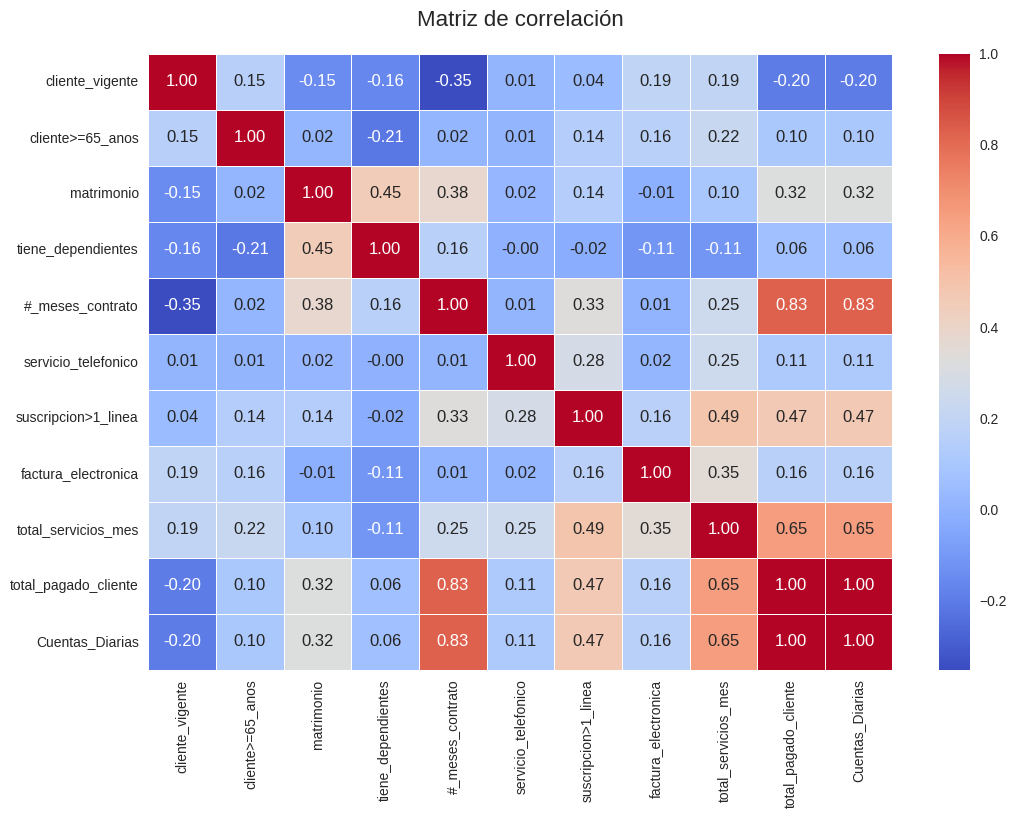

In [419]:
# Generamos un grafico para visualizar la correlación entre las variables cuantitativas o númericas.
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación", fontsize=16, pad=20)
plt.show()

#### Correlación y Selección de Variables
Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

In [420]:
# Vamos a verificar la correlación entre las variables
analisis_correlacion = datos[['#_meses_contrato', 'total_pagado_cliente', 'cliente_vigente']].corr()
analisis_correlacion
#

,#_meses_contrato,total_pagado_cliente,cliente_vigente
#_meses_contrato,1.000000,0.825880,-0.352229
total_pagado_cliente,0.825880,1.000000,-0.199484
cliente_vigente,-0.352229,-0.199484,1.000000


In [421]:
corr['cliente_vigente']

,cliente_vigente
cliente_vigente,1.000000
cliente>=65_anos,0.150889
matrimonio,-0.150448
tiene_dependientes,-0.164221
#_meses_contrato,-0.352229
servicio_telefonico,0.011942
suscripcion>1_linea,0.040102
factura_electronica,0.191825
total_servicios_mes,0.193356
total_pagado_cliente,-0.199484


#### Conclusiones de la Correlación
#_meses_contrato vs total_pagado_cliente: 0.825

Muy fuerte correlación positiva.

Significa que cuanto más meses tiene el cliente en contrato, mayor es el total pagado.

Es esperable: más tiempo = más facturación.

#_meses_contrato vs cliente_vigente: -0.352

Correlación negativa moderada.

Sugiere que a mayor número de meses en contrato, hay cierta tendencia a que el cliente ya no esté vigente (abandone el servicio).

No es muy fuerte, pero hay relación.

total_pagado_cliente vs cliente_vigente: -0.199

Correlación negativa débil.

Indica que los clientes que han pagado más tienden ligeramente a no estar vigentes, pero la relación es débil (casi cercana a 0).

En resumen:

La variable más fuerte es:
#_meses_contrato ↔ total_pagado_cliente (0.825).

Existe un patrón de rotación de clientes:
mientras más tiempo y más pagan, hay una ligera probabilidad de que ya no estén vigentes (correlaciones negativas con cliente_vigente).

Pero esas correlaciones negativas no son lo suficientemente fuertes como para sacar conclusiones absolutas; se debería complementar con otros análisis.

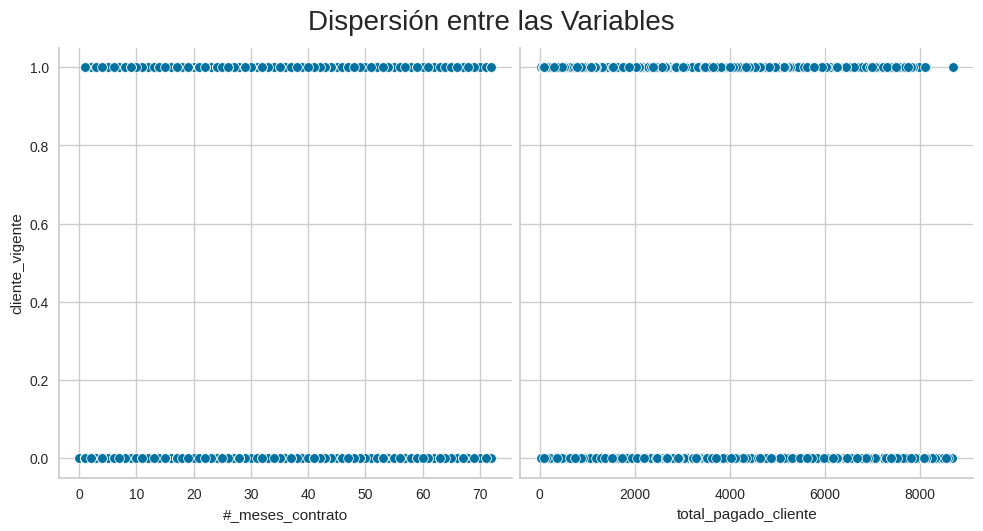

In [422]:
ax=sns.pairplot(datos,y_vars='cliente_vigente',x_vars=['#_meses_contrato','total_pagado_cliente'],height=5)
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

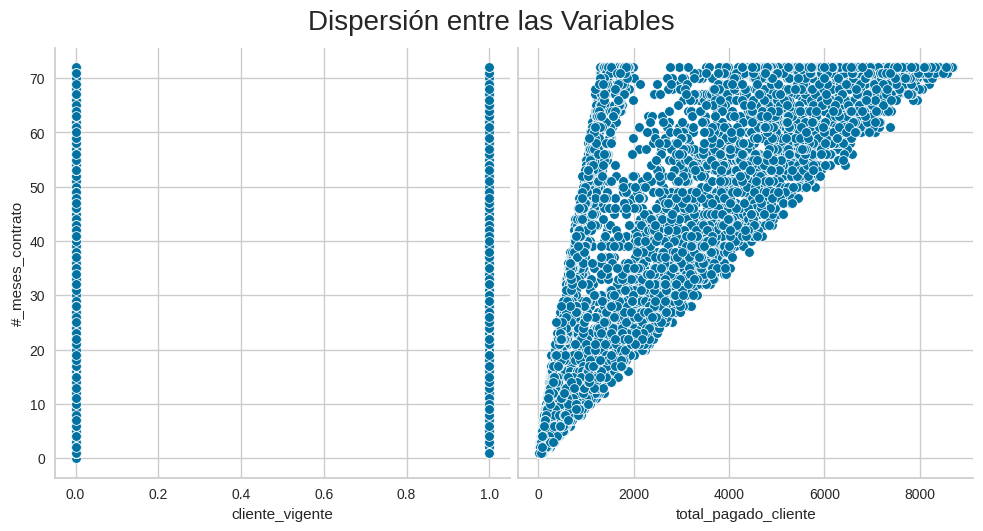

In [423]:
ax=sns.pairplot(datos,y_vars='#_meses_contrato',x_vars=['cliente_vigente','total_pagado_cliente'],height=5)
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

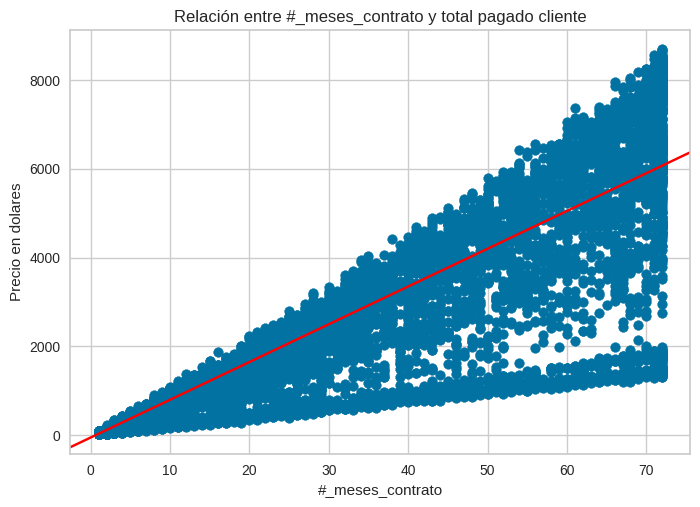

In [424]:
# Como se relacionan los meses de contrato respecto al pago total de los clientes
plt.scatter(datos['#_meses_contrato'], datos['total_pagado_cliente']) # Generamos un grafico de disperción
plt.axline(xy1=(10,800),xy2=(50,4200), color='red') # Agregamos una linea
plt.title('Relación entre #_meses_contrato y total pagado cliente')
plt.xlabel('#_meses_contrato')
plt.ylabel('Precio en dolares')
plt.show()

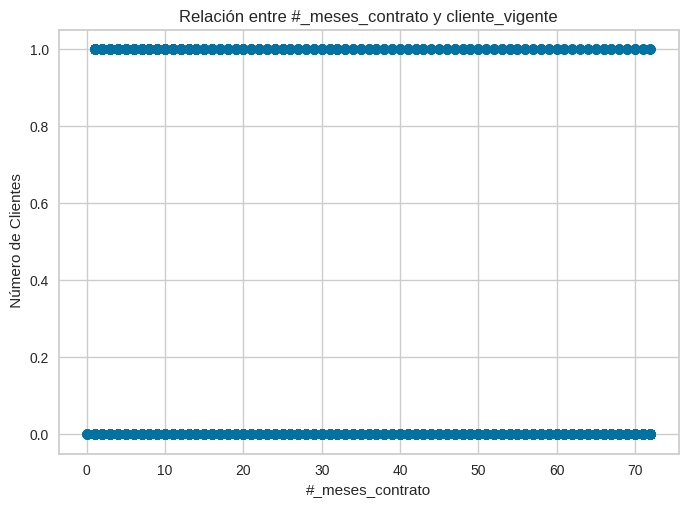

In [425]:
# Como se relacionan los # meses_contrato respecto a la vigencia/permanencia de los clientes en la compañia
plt.scatter(datos['#_meses_contrato'], datos['cliente_vigente']) # Generamos un grafico de disperción
plt.title('Relación entre #_meses_contrato y cliente_vigente')
plt.xlabel('#_meses_contrato')
plt.ylabel(' Número de Clientes')
plt.show()

#### OTRA FORMA DE TRANSFORMAR LOS DATOS Y NORMALIZARLOS

In [426]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Cargar dataset
#url = "https://raw.githubusercontent.com/Starleen1996/TelecomX_Parte2_Latam_Predicci-n_Modelos/refs/heads/main/df_clientes_LATAM.csv"
#df = pd.read_csv(url)

# 2. Definir variable objetivo y features
X = datos.drop("cliente_vigente", axis=1)
y = datos["cliente_vigente"]

# 3. Identificar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print("Columnas categóricas:", cat_cols)
print("Columnas numéricas:", num_cols)

# 4. Preprocesamiento: OneHotEncoder + Normalización
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# 5. Crear pipeline de preprocesamiento
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# 6. Transformar los datos
X_processed = pipeline.fit_transform(X)

# 7. Convertir a DataFrame para ver las columnas transformadas
# Obtener nombres de columnas nuevas
ohe_cols = pipeline.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(cat_cols)
all_cols = num_cols + list(ohe_cols)

X_df = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed,
                    columns=all_cols)

print("Shape final:", X_df.shape)
X_df.head()


Columnas categóricas: ['genero', 'internet_internetservice', 'suscripcion_seguridad_linea', 'suscripcion_de_respaldo', 'suscripcion_proteccion', 'suscripcion_soporte', 'suscripcion_tv_cable', 'suscripcion_peliculas', 'tipo_contrato', 'forma_pago']
Columnas numéricas: ['cliente>=65_anos', 'matrimonio', 'tiene_dependientes', '#_meses_contrato', 'servicio_telefonico', 'suscripcion>1_linea', 'factura_electronica', 'total_servicios_mes', 'total_pagado_cliente', 'Cuentas_Diarias']
Shape final: (7043, 40)


,cliente>=65_anos,matrimonio,tiene_dependientes,#_meses_contrato,servicio_telefonico,suscripcion>1_linea,factura_electronica,total_servicios_mes,total_pagado_cliente,Cuentas_Diarias,...,suscripcion_peliculas_0,suscripcion_peliculas_1,suscripcion_peliculas_No internet service,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,forma_pago_Bank transfer (automatic),forma_pago_Credit card (automatic),forma_pago_Electronic check,forma_pago_Mailed check
0,0.0,1.0,1.0,0.125000,1.0,0.0,1.0,0.471144,0.066294,0.066294,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.125000,1.0,1.0,0.0,0.414428,0.060420,0.060420,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.055556,1.0,0.0,1.0,0.553731,0.030239,0.030239,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.180556,1.0,0.0,1.0,0.793532,0.140670,0.140670,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.041667,1.0,0.0,1.0,0.653234,0.028687,0.028687,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Separación de Datos
Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [427]:

 from sklearn.model_selection import train_test_split

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y)

#Nota: Utilizamos el X_df transformado en el siguiente código

#X_df = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed,
                   # columns=all_cols)

#### Creación de Modelos
Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

## Modelo de referencia - Baseline
####Modelo Dummy
Un modelo base es muy importante para definir un criterio de comparación para modelos más complejos. En esta etapa, crea un modelo base con el DummyClassifier y encuentra la tasa de acierto con el método score.

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [429]:
# Modelo de referencia Baseline
from sklearn.dummy import DummyClassifier

In [430]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.73450070989115

## Árboles de Decisión sin profundidad
El modelo de árbol de decisión es muy utilizado debido a su alta explicabilidad y procesamiento rápido, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de menor y mayor en los valores de las columnas de la base de datos.

In [431]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [432]:
# Vamos a establecer el modelo de arbol de decisiones inicualmente sin definir una profundidad (max_depth)
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [433]:
modelo_arbol.score(X_test,y_test)
#De acuerdo a los resultados que tienes en pantalla podemos resumir lo siguiente:

#Modelo Baseline (DummyClassifier):
#Obtuvo un score de 0.7345 aproximadamente.
#Este modelo sirve únicamente como punto de referencia, ya que no aprende patrones reales de los datos, sino que sigue una estrategia trivial (por ejemplo, predecir siempre la clase mayoritaria).

#Modelo Árbol de Decisión (DecisionTreeClassifier):
#Obtuvo un score de 0.7302 aproximadamente.
#Aunque este modelo sí aprende de los datos y toma decisiones basadas en las variables, en este caso su desempeño fue muy similar al del modelo Dummy (ligeramente inferior incluso).

# 🔎 Conclusión:

#El Árbol de Decisión no está logrando mejorar el desempeño con respecto al modelo de referencia. Esto puede indicar que:
#Los datos no tienen patrones suficientemente fuertes para que un árbol simple los capture.
#Puede ser necesario ajustar hiperparámetros del árbol (profundidad, número mínimo de muestras por hoja, etc.) para evitar sobreajuste o subajuste.
#Se podrían probar modelos más robustos (Random Forest, Gradient Boosting) o hacer ingeniería de características.

0.7302413629910081

##Árboles de Decisión con profundidad

In [434]:
modelo_arbol = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [435]:
modelo_arbol.score(X_test,y_test)
# Evaluamos el modelo con datos de prueba con una profundidad de 5 y estado de aleatoriedad de 42

0.7931850449597728

In [436]:
modelo_arbol.score(X_train,y_train)
# Evaluamos el modelo con datos de entrenamiento con una profundidad de 5 y estado de aleatoriedad de 42

0.8079107505070994

# 🔎  Resultados Modelo Árbol de Decisión Ajustado

Score en datos de prueba (X_test): 0.7931

Score en datos de entrenamiento (X_train): 0.8079

📊 Resumen

Mejora frente al baseline:
Antes, tu Árbol sin restricciones estaba cerca de 0.73 en test, ahora subió a ~0.79, lo cual indica que limitar la profundidad ayudó al modelo a generalizar mejor.

Generalización adecuada:
La diferencia entre entrenamiento (0.8079) y prueba (0.7931) es muy pequeña (~0.015).
👉 Esto es una señal positiva: el modelo no está sobreajustado y mantiene un desempeño bastante estable en datos no vistos.

Impacto del hiperparámetro max_depth:
Al limitar la profundidad a 5, el modelo evitó memorizar los datos de entrenamiento y logró un balance entre sesgo y varianza.

✅ Conclusión

El ajuste de profundidad mejoró la capacidad de generalización del Árbol de Decisión.

El modelo ahora supera claramente al baseline y tiene un buen equilibrio entre entrenamiento y prueba.

Aún se podría explorar más hiperparámetros (criterio de división, número mínimo de muestras por hoja, etc.), pero ya se evidencia un avance significativo.

In [437]:
# Vamos a guardar el modelo para usarlo posteriormente

import pickle

In [438]:
with open("modelo_arbol_decision.pkl", "wb") as archivo_salida:
    pickle.dump(modelo_arbol, archivo_salida)

print("✅ Modelo guardado como 'modelo_arbol_decision.pkl'")

✅ Modelo guardado como 'modelo_arbol_decision.pkl'


In [439]:
# Vamos a definir el código para cargar el modelo Arbol de decisión:
with open("modelo_arbol_decision.pkl", "rb") as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)

print("✅ Modelo cargado correctamente")

✅ Modelo cargado correctamente


In [440]:
# Vamos a definir el código para usar el modelo Arbol de Decisiones en futuros datos
y_pred = modelo_cargado.predict(X_test)
print("Predicciones con modelo cargado:", y_pred[:10])

Predicciones con modelo cargado: [0 0 1 0 0 0 0 0 1 0]


## Modelo de Regresión Logística

In [441]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split




In [447]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y)

In [456]:
# quiero verificar las filas con datos NaN
X_train.isnull().sum()
X_test.isnull().sum()



,0
cliente>=65_anos,0
matrimonio,0
tiene_dependientes,0
#_meses_contrato,0
servicio_telefonico,0
suscripcion>1_linea,0
factura_electronica,0
total_servicios_mes,0
total_pagado_cliente,2
Cuentas_Diarias,2


In [457]:
# Quiero remplazar los datos NaN por la media de los datos en las columnas  total_pagado_cliente	2 y Cuentas_Diarias
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [458]:
# Establecemos nuestro modelo de regresión logistica
modelo_regresion_logistico = LogisticRegression(max_iter=1000)
modelo_regresion_logistico.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [459]:
# Evaluamos el score de nuestras variables de prueba
modelo_regresion_logistico.score(X_test,y_test)

0.7974443918599148

In [460]:
# Evaluamos el score de nuestras variables de entrenamiento
modelo_regresion_logistico.score(X_train,y_train)

0.8097363083164301

#### Resumen del Modelo Regresión Logística - Sin Balanceo

📊 Resultados obtenidos

Accuracy (**Exactitud**) en prueba (X_test, y_test)
Esto significa que, de todos los clientes en tu conjunto de prueba, el modelo predice correctamente si se quedan o se van en un **79.7%** de los casos.

Accuracy (**Exactitud**) en entrenamiento (X_train, y_train)
En los datos con los que el modelo aprendió, acierta en un **80.9%** de los casos.

🔎 Interpretación

Generalización: Los resultados de entrenamiento (**80.9%**) y prueba (**79.7%**) son muy similares → el modelo no está sobreajustado (no memorizó los datos) y generaliza bien a nuevos clientes.

Buen desempeño inicial: Acertar casi en 8 de cada 10 clientes es un desempeño razonable para un primer modelo.

Limitaciones de Accuracy: En churn, muchas veces el problema está desbalanceado (es decir, hay más clientes que permanecen que los que se retiran). El accuracy puede ser engañoso, porque el modelo podría estar prediciendo bien a los que permanecen y fallando en los que se van, que suelen ser los más importantes para la empresa.

✅ En conclusión: Tu modelo logra ~80% de aciertos y generaliza bien, lo cual es un buen punto de partida. El siguiente paso es profundizar en métricas como recall para clientes que abandonan, ya que para la empresa es más costoso no detectar a un cliente que se va que equivocarse en un cliente que se queda.

In [464]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = modelo_regresion_logistico.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1382  170]
 [ 258  303]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



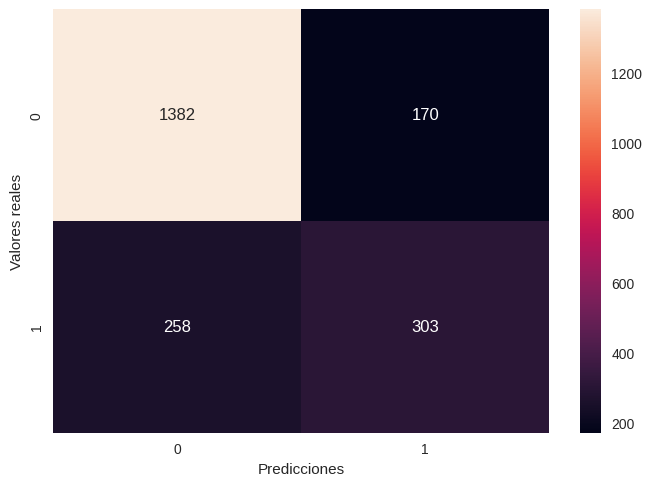

In [466]:
## Vamos a graficas la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

📊 **1. Matriz de confusión**

[[1382  170]

[ 258  303]]

 1382 (Verdaderos Negativos, VN): Clientes que realmente NO se fueron (0) y el modelo predijo correctamente que se quedan.

170 (Falsos Positivos, FP): Clientes que el modelo predijo que se iban, pero en realidad se quedaron.

258 (Falsos Negativos, FN): Clientes que realmente se fueron, pero el modelo dijo que se quedaban.

303 (Verdaderos Positivos, VP): Clientes que realmente se fueron y el modelo lo predijo correctamente.

**📊 2. Reporte de clasificación**

**Para clase 0 (clientes que permanecen):**

Precision = 0.84: El 84% de los que predijo como "no se van" realmente no se fueron.

Recall = 0.89: Detecta bien a los que se quedan (89%).

F1-Score = 0.87: Buen balance entre precisión y recall.
📌 El modelo es bastante sólido para identificar clientes que se quedan.

**Para clase 1 (clientes que se van = churn):**

Precision = 0.64: De todos los que el modelo predijo que se iban, solo el 64% realmente se fue.

Recall = 0.54: Solo detecta al 54% de los clientes que efectivamente se fueron.

F1-Score = 0.59: Débil en comparación con la clase 0.
📌 Aquí está el problema: el modelo no está capturando bien a los clientes que hacen churn.

📊**3. Métricas generales**

Accuracy (exactitud) = 0.80: El modelo acierta en el 80% de los casos.
⚠️ Pero este número está sesgado porque hay muchos más clientes que se quedan (clase 0) que los que se van (clase 1).

Macro avg (0.73 en F1): Promedio simple entre ambas clases (muestra que el modelo es más débil en la clase 1).

Weighted avg (0.79 en F1): Promedio ponderado según la cantidad de ejemplos, está dominado por la clase 0.

**Conclusión para la empresa de telecomunicaciones:**

El modelo es bueno detectando quiénes se quedan (clase 0).

Pero es regular detectando quiénes se van (clase 1, churn) → solo identifica al 54% de ellos.

En términos de negocio:
🔹 Puedes confiar bastante en los clientes que el modelo dice que se quedarán.
🔹 Pero deberías mejorar la sensibilidad (recall) para no perder clientes que realmente se van.

## Modelo Regresion Logistica - Con Balanceo

In [467]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [468]:
# Aplicar SMOTE SOLO en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Antes de SMOTE:", y_train.value_counts())
print("Después de SMOTE:", y_train_res.value_counts())

Antes de SMOTE: cliente_vigente
0    3622
1    1308
Name: count, dtype: int64
Después de SMOTE: cliente_vigente
0    3622
1    3622
Name: count, dtype: int64


In [469]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [474]:
model.score(X_train_res, y_train_res)

0.7813362782992822

In [473]:
model.score(X_test, y_test)

0.7463322290582111

In [471]:
# Predicciones
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [472]:
# Evaluación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1133  419]
 [ 117  444]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.51      0.79      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



In [ ]:
# Establecemos nuestro modelo de regresión logistica
modelo_regresion_logistico = LogisticRegression(max_iter=1000)
modelo_regresion_logistico.fit(X_train, y_train)

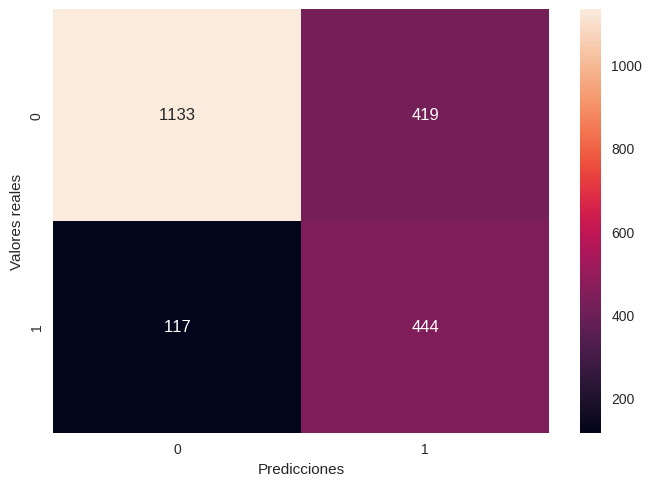

In [475]:
# Vamos a graficar nuevamente la matriz de confusión con el balanceo (SMOTE)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

#### Resumen del Modelo Regresion Lineal com SMOTE

📊 **Resultados actuales (con SMOTE):**

**Clase 0 (No churn)**

Precision: 0.91

Recall: 0.73

F1-score: 0.81

**Clase 1 (Sí churn, clientes que se van)**

Precision: 0.51

Recall: 0.79

F1-score: 0.62

**Métricas globales**

Accuracy: 0.75

Recall promedio: 0.76

🔍**Interpretación**

El modelo ya mejoró bastante el recall de la clase 1 (79%) gracias a SMOTE ✅.

Esto significa que ahora detecta a la mayoría de los clientes que abandonan (lo que pediste en el punto 1).

Pero hay un costo: la precisión para clase 1 bajó a 0.51, lo que implica más falsos positivos (clientes que el modelo cree que se van, pero en realidad no).



In [476]:
## Descargando el modelo Regresión logístico
# 1. Guardar el modelo entrenado en un archivo .pkl
with open("modelo_regresion_logistica.pkl", "wb") as archivo_salida:
    pickle.dump(modelo_regresion_logistico, archivo_salida)

print("✅ Modelo guardado como 'modelo_regresion_logistica.pkl'")

✅ Modelo guardado como 'modelo_regresion_logistica.pkl'


In [477]:
# 2. Cargar el modelo cuando lo necesites
with open("modelo_regresion_logistica.pkl", "rb") as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)

print("✅ Modelo cargado correctamente")

# 3. Usar el modelo cargado para predecir
y_pred = modelo_cargado.predict(X_test)
print("Predicciones con modelo cargado:", y_pred[:10])

✅ Modelo cargado correctamente
Predicciones con modelo cargado: [0 0 1 0 0 0 0 0 1 0]


## Vamos a Establecer el Modelo KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [478]:
from sklearn.neighbors import KNeighborsClassifier

In [479]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [485]:
knn.score(X_train, y_train)

0.8383367139959432

In [481]:
knn.score(X_test, y_test)

0.751538097491718

In [486]:
# Vamos a visualizar el reporte de clasificación y la matriz de confusión para el modelo KNN
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1552
           1       0.53      0.51      0.52       561

    accuracy                           0.75      2113
   macro avg       0.68      0.67      0.68      2113
weighted avg       0.75      0.75      0.75      2113

[[1303  249]
 [ 276  285]]


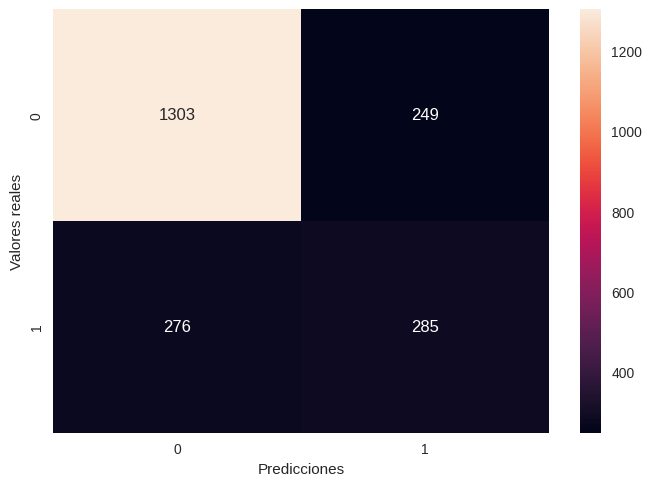

In [487]:
# Vamos a graficar la matriz de confusión para el modelo KNN
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()
#

In [488]:
# Guardamos nuestro modelo KNN
with open("modelo_knn.pkl", "wb") as archivo_salida:
    pickle.dump(knn, archivo_salida)

print("✅ Modelo guardado como 'modelo_knn.pkl'")

✅ Modelo guardado como 'modelo_knn.pkl'


##Escogiendo y serializando el mejor modelo
Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

In [491]:
lista = [('dummy',dummy,X_test),('Arbol_Decisiones',modelo_arbol,X_test),('KNN',knn,X_test),('Regresión_Logística_Balanceado',model,X_test)]
for i in lista:
    print(f' La exactitud del modelo {i[0]}: {i[1].score(i[2], y_test)}')

#i[0] → Muestra el nombre del modelo.
#i[1] → Es el modelo, sobre el que se llama al método .score(...).
#i[2] → Es el conjunto de datos de prueba que se pasa a .score().
#y_test → Son las etiquetas verdaderas para las predicciones.
#.score(X, y) en la mayoría de modelos de scikit-learn devuelve la exactitud (accuracy) para clasificación, o el R² para regresión.

 La exactitud del modelo dummy: 0.73450070989115
 La exactitud del modelo Arbol_Decisiones: 0.7931850449597728
 La exactitud del modelo KNN: 0.751538097491718
 La exactitud del modelo Regresión_Logística_Balanceado: 0.7463322290582111


 La exactitud del modelo Dummy: 0.7345
 La exactitud del modelo Árbol de Decisiones: 0.7932
 La exactitud del modelo KNN: 0.7515
 La exactitud del modelo Regresión Logística Balanceada: 0.7463


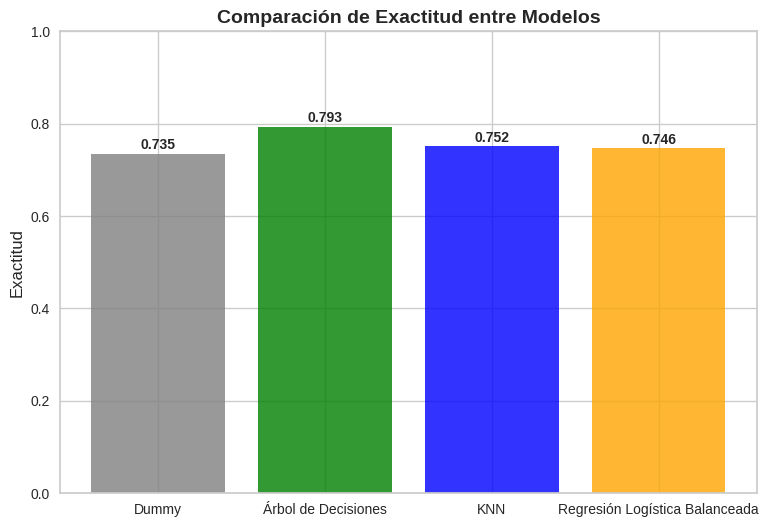

In [494]:
import matplotlib.pyplot as plt

# Lista de modelos
lista = [
    ('Dummy', dummy, X_test),
    ('Árbol de Decisiones', modelo_arbol, X_test),
    ('KNN', knn, X_test),
    ('Regresión Logística Balanceada', model, X_test)
]

# Guardar resultados de exactitud
nombres = []
exactitudes = []

for i in lista:
    score = i[1].score(i[2], y_test)
    print(f' La exactitud del modelo {i[0]}: {score:.4f}')
    nombres.append(i[0])
    exactitudes.append(score)

# Graficar resultados
plt.figure(figsize=(9,6))
bars = plt.bar(nombres, exactitudes, color=["gray", "green", "blue", "orange"], alpha=0.8)

# Etiquetas y formato
plt.ylabel("Exactitud", fontsize=12)
plt.title("Comparación de Exactitud entre Modelos", fontsize=14, fontweight='bold')
plt.ylim(0, 1)

# Mostrar valores sobre las barras
for bar, valor in zip(bars, exactitudes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{valor:.3f}", ha='center', fontsize=10, fontweight='bold')

plt.show()


##Resultados reportados (Exactitud):

**Modelo Dummy (baseline): 0.7345**

**Árbol de Decisiones: 0.7931**

**KNN: 0.7515**

**Regresión Logística (balanceada): 0.7463**

🔎 **Conclusiones principales:**

**Comparación con el modelo Dummy**

El modelo Dummy sirve como referencia (predice lo más frecuente o al azar).

Todos los modelos superan la exactitud del Dummy, lo cual indica que sí están aprendiendo patrones reales en los datos.

**Árbol de Decisiones → Mejor exactitud (0.7931)**

Es el modelo con mejor desempeño global en términos de exactitud.

Sugiere que los datos pueden tener relaciones no lineales y jerárquicas que el árbol captura mejor que KNN o la regresión logística.

KNN (0.7515) vs. Regresión Logística (0.7463 balanceada)

Ambos tienen un rendimiento similar, aunque el KNN ligeramente mejor.

El hecho de que la Regresión Logística balanceada esté cerca al KNN indica que el desbalance de clases sí afecta al dataset, y balancear ayuda a no perder sensibilidad hacia la clase minoritaria (churn).

**Importancia del balanceo**

Aunque la regresión balanceada no tiene la mayor exactitud, su fortaleza está en mejorar el recall de los clientes churn (clase 1).

La exactitud por sí sola puede ser engañosa en datasets desbalanceados: un modelo puede tener buena exactitud pero ser malo prediciendo churn.

**Conclusión final:**

El modelo Dummy alcanza una exactitud del 73.4%, lo que representa nuestra línea base. Todos los modelos superan este valor, confirmando que aprenden patrones útiles. El Árbol de Decisiones se posiciona como el mejor clasificador en términos de exactitud (79.3%), lo que indica que logra capturar relaciones complejas en los datos. Por su parte, KNN (75.1%) y la Regresión Logística balanceada (74.6%) tienen un rendimiento similar, aunque la regresión balanceada aporta la ventaja de mejorar la detección de clientes en riesgo de churn gracias al ajuste frente al desbalance de clases. En conclusión, el Árbol de Decisiones es el más preciso globalmente, pero la Regresión Logística balanceada puede ser preferida si el objetivo principal es mejorar la sensibilidad en la predicción de clientes que se van.

In [492]:
from sklearn.metrics import recall_score

# Lista de modelos con sus nombres
lista = [
    ('dummy', dummy, X_test),
    ('Arbol_Decisiones', modelo_arbol, X_test),
    ('KNN', knn, X_test),
    ('Regresión_Logística_Balanceado', model, X_test)
]

# Calcular y mostrar el recall
for nombre, modelo, X in lista:
    y_pred = modelo.predict(X)   # Predicciones del modelo
    recall = recall_score(y_test, y_pred, pos_label=1)  # Recall de la clase churn (1)
    print(f' El recall del modelo {nombre}: {recall:.4f}')

 El recall del modelo dummy: 0.0000
 El recall del modelo Arbol_Decisiones: 0.5294
 El recall del modelo KNN: 0.5080
 El recall del modelo Regresión_Logística_Balanceado: 0.7914


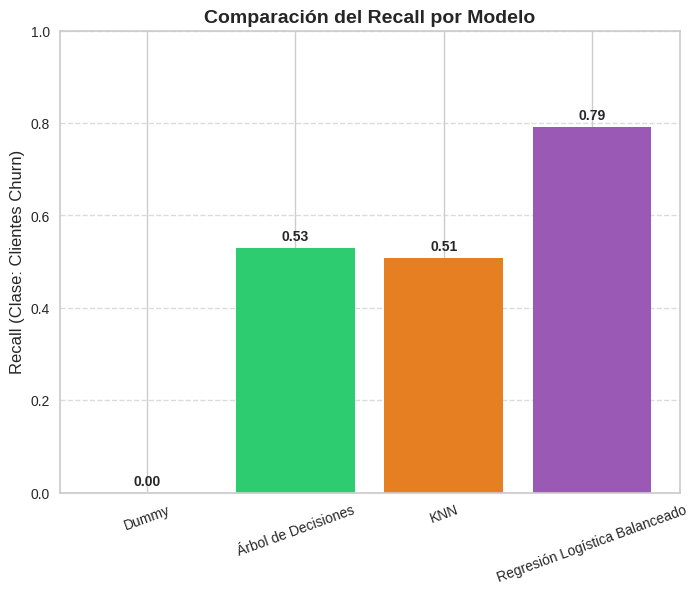

In [493]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

# Lista de modelos
lista = [
    ('Dummy', dummy, X_test),
    ('Árbol de Decisiones', modelo_arbol, X_test),
    ('KNN', knn, X_test),
    ('Regresión Logística Balanceado', model, X_test)
]

# Calcular recalls
recalls = []
nombres = []

for nombre, modelo, X in lista:
    y_pred = modelo.predict(X)
    recall = recall_score(y_test, y_pred, pos_label=1)  # clase churn
    recalls.append(recall)
    nombres.append(nombre)

# Graficar
plt.figure(figsize=(8,6))
bars = plt.bar(nombres, recalls, color=['#3498db','#2ecc71','#e67e22','#9b59b6'])

# Agregar etiquetas con valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Comparación del Recall por Modelo", fontsize=14, fontweight='bold')
plt.ylabel("Recall (Clase: Clientes Churn)", fontsize=12)
plt.ylim(0,1)
plt.xticks(rotation=20, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


📌 **Conclusiones del recall por modelo:**

**Modelo Dummy (0.0000)**

El modelo no logra identificar ningún cliente que hace churn (1).

Esto confirma que el modelo dummy no es útil como predictor, solo sirve como referencia de base.

**Árbol de Decisiones (0.5294)**

Logra identificar un poco más de la mitad de los clientes que hacen churn.

Aunque es un avance respecto al dummy, aún deja escapar casi la mitad de los clientes que realmente abandonan.

Puede estar sobreajustando o priorizando otras métricas (como exactitud) en lugar de la sensibilidad.

**KNN (0.5080)**

Tiene un rendimiento muy similar al árbol de decisiones en términos de recall.

Esto sugiere que KNN tampoco logra capturar con suficiente eficacia los casos minoritarios de churn, posiblemente por la distribución de clases desbalanceada.

**Regresión Logística Balanceada (0.7914)**

Es el modelo que mejor logra identificar a los clientes que abandonan.

Con casi un 80% de recall, se convierte en el más prometedor si la prioridad es detectar churn, aunque podría sacrificar algo de precisión en las predicciones.

Esto confirma que aplicar técnicas de balanceo de clases es clave para este problema.

**✅ Conclusión general:**
El modelo de regresión logística balanceado es el más adecuado si el objetivo del negocio es maximizar la detección de clientes en riesgo de abandono, ya que ofrece un recall muy superior.
En contraste, árbol de decisiones y KNN se comportan de forma similar pero insuficiente, y el modelo dummy es completamente ineficaz.

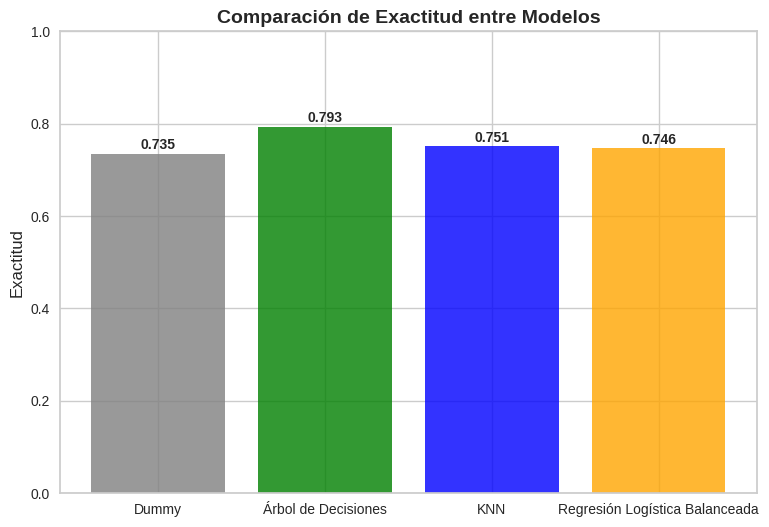

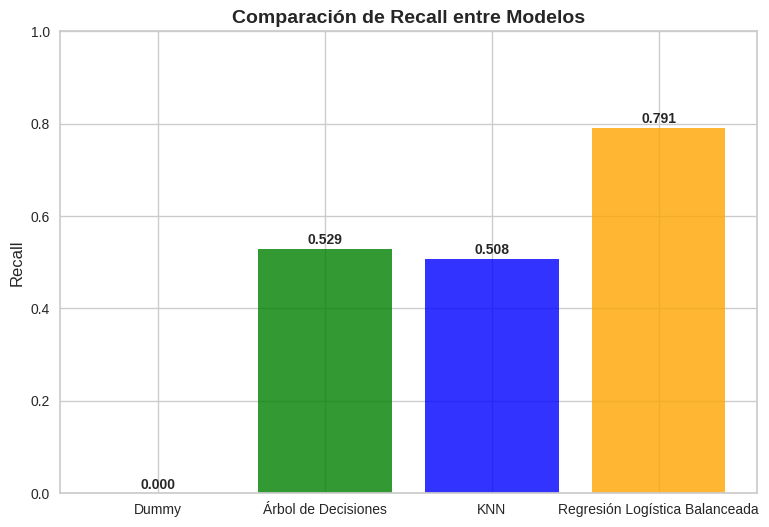

In [495]:
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplázalos con tus valores reales)
nombres = ['Dummy', 'Árbol de Decisiones', 'KNN', 'Regresión Logística Balanceada']
exactitudes = [0.7345, 0.7931, 0.7515, 0.7463]   # tus valores calculados
recalls = [0.0000, 0.5294, 0.5080, 0.7914]       # tus valores calculados

# ---------- GRÁFICO DE EXACTITUD ----------
plt.figure(figsize=(9,6))
bars = plt.bar(nombres, exactitudes, color=["gray", "green", "blue", "orange"], alpha=0.8)
plt.ylabel("Exactitud", fontsize=12)
plt.title("Comparación de Exactitud entre Modelos", fontsize=14, fontweight='bold')
plt.ylim(0, 1)

# Mostrar valores encima de las barras
for bar, valor in zip(bars, exactitudes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{valor:.3f}", ha='center', fontsize=10, fontweight='bold')

# Guardar el gráfico como imagen
plt.savefig("exactitud_modelos.png", dpi=300, bbox_inches="tight")
plt.show()

# ---------- GRÁFICO DE RECALL ----------
plt.figure(figsize=(9,6))
bars = plt.bar(nombres, recalls, color=["gray", "green", "blue", "orange"], alpha=0.8)
plt.ylabel("Recall", fontsize=12)
plt.title("Comparación de Recall entre Modelos", fontsize=14, fontweight='bold')
plt.ylim(0, 1)

# Mostrar valores encima de las barras
for bar, valor in zip(bars, recalls):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{valor:.3f}", ha='center', fontsize=10, fontweight='bold')

# Guardar el gráfico como imagen
plt.savefig("recall_modelos.png", dpi=300, bbox_inches="tight")
plt.show()


##Análisis de la Importancia de las Variables
1. Regresión Logística Balanceada

La ventaja de este modelo es que es interpretable:

Cada variable tiene un coeficiente (peso) → indica cómo cambia la probabilidad de cancelación.

El signo del coeficiente:

(+) → aumenta la probabilidad de churn.

(-) → reduce la probabilidad de churn.

La magnitud absoluta → indica la importancia relativa de la variable.

👉 Código para extraer coeficientes:

In [496]:
import pandas as pd
import numpy as np

# Coeficientes
coef = model.coef_[0]
variables = X_train.columns

importancia = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coef,
    'Impacto': np.exp(coef)  # odds ratio
}).sort_values(by="Impacto", ascending=False)

print(importancia)


                                           Variable  Coeficiente   Impacto
8                              total_pagado_cliente     1.256243  3.512200
9                                   Cuentas_Diarias     1.256243  3.512200
33                     tipo_contrato_Month-to-month     0.755623  2.128937
6                               factura_electronica     0.508558  1.662891
14             internet_internetservice_Fiber optic     0.390565  1.477815
38                      forma_pago_Electronic check     0.333616  1.396007
5                               suscripcion>1_linea     0.281835  1.325560
24                            suscripcion_soporte_0     0.267029  1.306078
15                    suscripcion_seguridad_linea_0     0.212980  1.237360
0                                  cliente>=65_anos     0.168973  1.184088
28                           suscripcion_tv_cable_1     0.152909  1.165219
31                          suscripcion_peliculas_1     0.149187  1.160890
18                       

2. KNN

KNN no tiene coeficientes, pero puedes investigar las variables con:

Análisis de distancias → ver cuáles variables más contribuyen a diferenciar clientes que cancelan vs. los que no.

Feature importance vía permutación:

Se mide cómo cambia el desempeño del modelo si "rompes" (permutas) una variable.

Si el recall baja mucho, esa variable es clave.

In [497]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

importancia_knn = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': result.importances_mean
}).sort_values(by="Importancia", ascending=False)

print(importancia_knn)


                                           Variable  Importancia
3                                  #_meses_contrato     0.008093
6                               factura_electronica     0.005963
9                                   Cuentas_Diarias     0.005395
8                              total_pagado_cliente     0.005395
34                           tipo_contrato_One year     0.005253
7                               total_servicios_mes     0.005159
33                     tipo_contrato_Month-to-month     0.004259
25                            suscripcion_soporte_1     0.004212
24                            suscripcion_soporte_0     0.003928
28                           suscripcion_tv_cable_1     0.003691
13                     internet_internetservice_Dsl     0.002792
18                        suscripcion_de_respaldo_0     0.002698
35                           tipo_contrato_Two year     0.002603
27                           suscripcion_tv_cable_0     0.001609
4                        

3. **Árbol de Decisiones**

Aquí es mucho más visual:

El árbol aprende umbrales de decisión (ejemplo: "si el cliente tiene más de 6 meses → menos probabilidad de churn").

Puedes ver la importancia de variables directamente del modelo.

In [498]:
importancia_arbol = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_arbol.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print(importancia_arbol)


                                           Variable  Importancia
33                     tipo_contrato_Month-to-month     0.517507
3                                  #_meses_contrato     0.192904
14             internet_internetservice_Fiber optic     0.139521
24                            suscripcion_soporte_0     0.029709
38                      forma_pago_Electronic check     0.026173
9                                   Cuentas_Diarias     0.025229
7                               total_servicios_mes     0.017275
8                              total_pagado_cliente     0.013716
5                               suscripcion>1_linea     0.013159
4                               servicio_telefonico     0.006838
6                               factura_electronica     0.005969
25                            suscripcion_soporte_1     0.005713
15                    suscripcion_seguridad_linea_0     0.004664
18                        suscripcion_de_respaldo_0     0.001179
34                       

🔹 **Conclusiones esperadas (a modo de guía)**:

Regresión Logística → te dará insight de qué variables aumentan o reducen churn.

KNN → te mostrará cuáles variables son más relevantes para medir la similitud entre clientes.

Árbol de Decisiones → te dará reglas claras de negocio del tipo "clientes con menos de X meses y que pagan menos de Y → más probabilidad de churn".

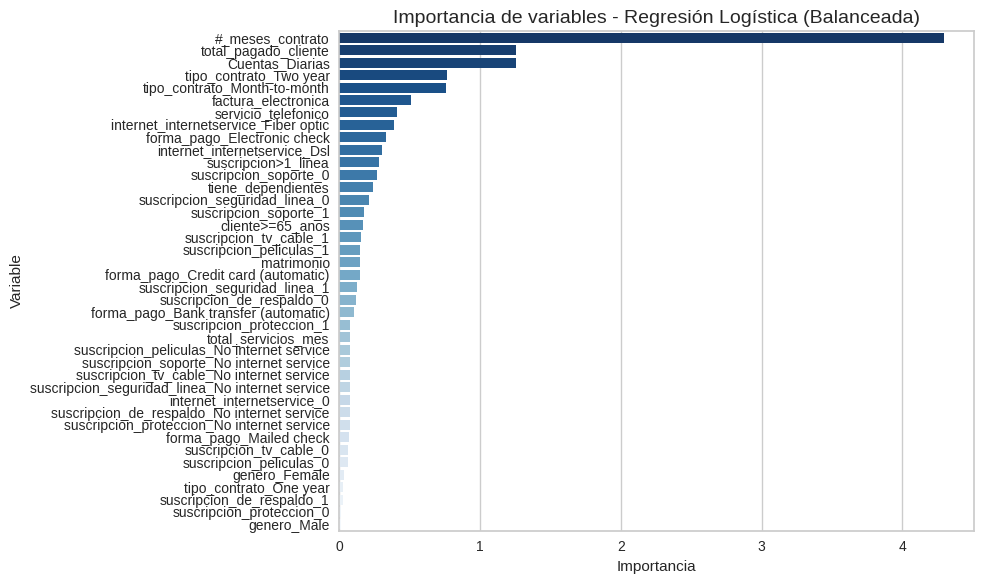

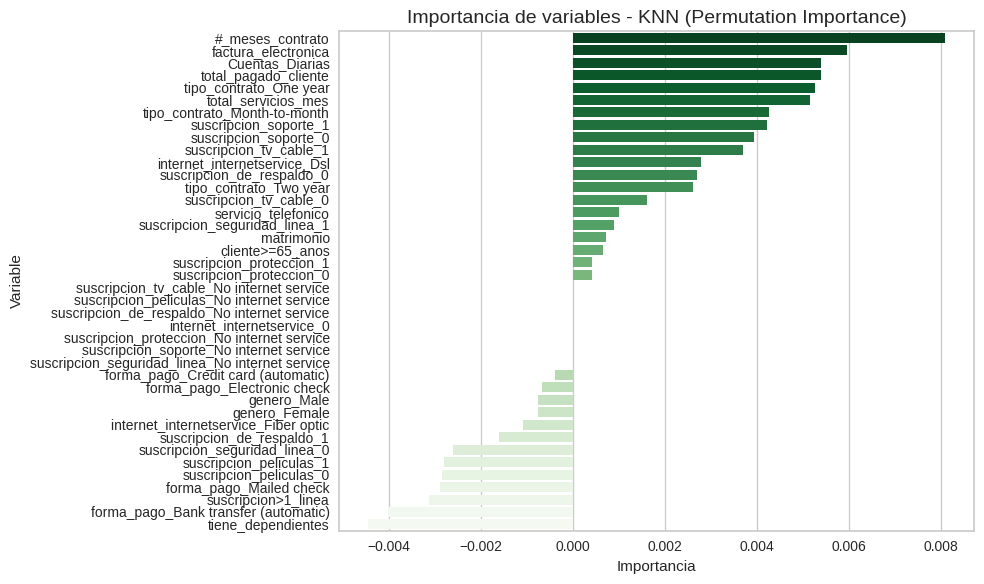

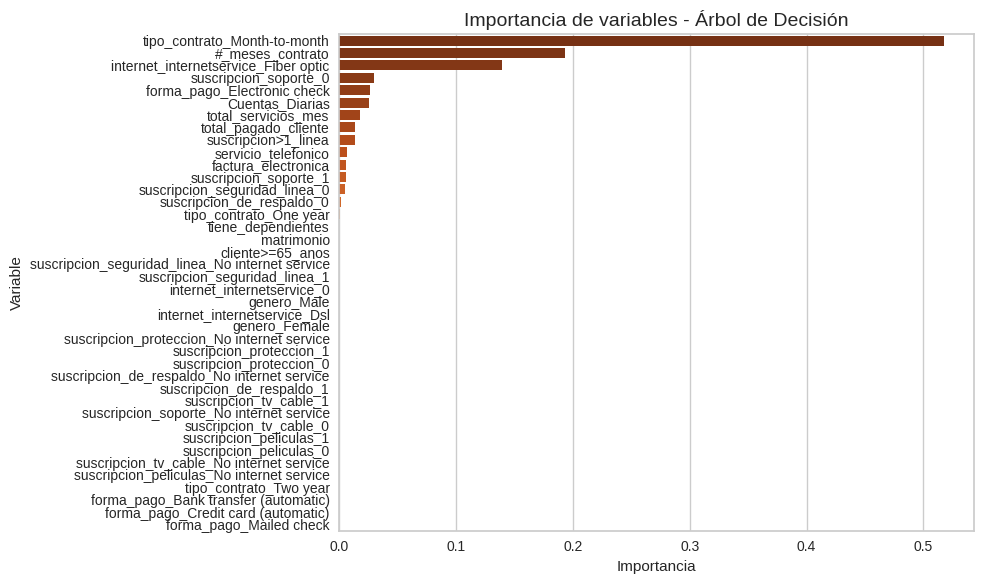

In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# -----------------------------
# 1. Importancia en Regresión Logística
# -----------------------------
coef = model.coef_[0]
importancia_log = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': np.abs(coef)
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importancia_log, x="Importancia", y="Variable", palette="Blues_r")
plt.title("Importancia de variables - Regresión Logística (Balanceada)", fontsize=14)
plt.tight_layout()
plt.savefig("importancia_regresion_logistica.png", dpi=300, bbox_inches="tight")
plt.show()

# -----------------------------
# 2. Importancia en KNN (Permutation Importance)
# -----------------------------
result_knn = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
importancia_knn = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': result_knn.importances_mean
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importancia_knn, x="Importancia", y="Variable", palette="Greens_r")
plt.title("Importancia de variables - KNN (Permutation Importance)", fontsize=14)
plt.tight_layout()
plt.savefig("importancia_knn.png", dpi=300, bbox_inches="tight")
plt.show()

# -----------------------------
# 3. Importancia en Árbol de Decisiones
# -----------------------------
importancia_arbol = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_arbol.feature_importances_
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importancia_arbol, x="Importancia", y="Variable", palette="Oranges_r")
plt.title("Importancia de variables - Árbol de Decisión", fontsize=14)
plt.tight_layout()
plt.savefig("importancia_arbol.png", dpi=300, bbox_inches="tight")
plt.show()

